# FAI hw 08

최재필

## Q1. NLP

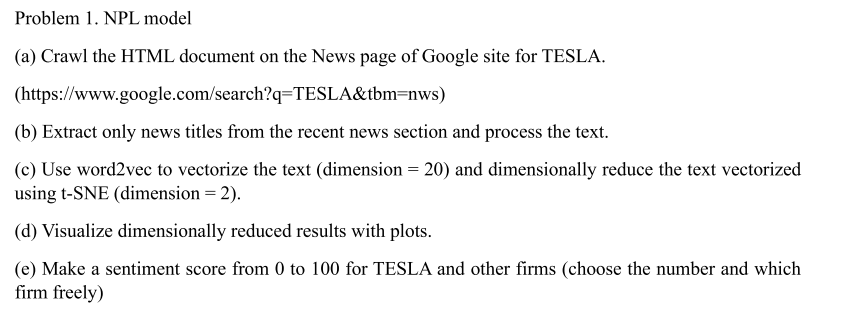

In [1]:
import nltk
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import re


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

### a. Crawl News

... instead copy paste 10 articles 

In [8]:
hw08_PATH = Path.cwd() / 'hw08'

In [11]:
TSLA_news = []

for file in hw08_PATH.glob('tesla*.txt'):
    with open(file, 'r') as f:
        TSLA_news.append(f.read())

In [48]:
TSLA_newstitles = []

for file in hw08_PATH.glob('tesla*.txt'):
    with open(file, 'r') as f:
        TSLA_newstitles.append(f.readline())

### c. word2vec & t-SNE

- word2vec dimension=20
- t-SNE dimension=2

In [27]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords


def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text.lower())
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chlje\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chlje\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
processed_texts = [preprocess_text(text) for text in TSLA_news]
model = Word2Vec(processed_texts, vector_size=20, window=5, min_count=1, workers=4)
unique_words = list(model.wv.index_to_key)
word2vecs = np.array([model.wv[word] for word in unique_words])
tsne = TSNE(n_components=2, random_state=0)
reduced = tsne.fit_transform(word2vecs)

### c. t-SNE visualization

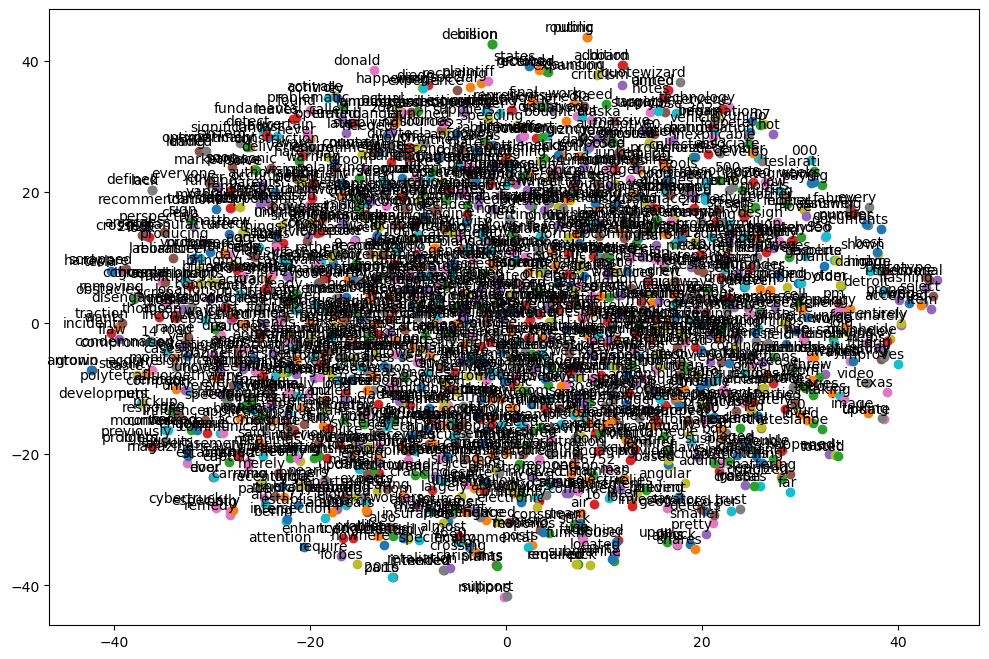

In [33]:
plt.figure(figsize=(12, 8))
for i, word in enumerate(unique_words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.annotate(word, xy=(reduced[i, 0], reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

제목만 가지고 했을 때

In [49]:
processed_texts = [preprocess_text(text) for text in TSLA_newstitles]
model = Word2Vec(processed_texts, vector_size=20, window=5, min_count=1, workers=4)
unique_words = list(model.wv.index_to_key)
word2vecs = np.array([model.wv[word] for word in unique_words])
tsne = TSNE(n_components=2, random_state=0)
reduced = tsne.fit_transform(word2vecs)

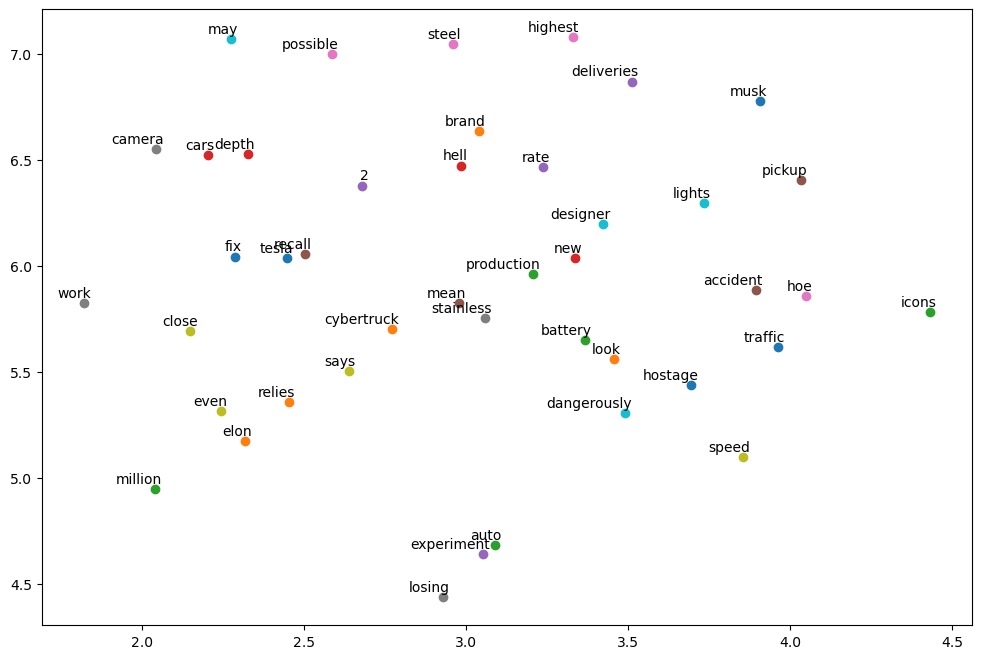

In [50]:
plt.figure(figsize=(12, 8))
for i, word in enumerate(unique_words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.annotate(word, xy=(reduced[i, 0], reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

### e. Make sentiment score

0~100 for TESLA

In [34]:
from transformers import pipeline

In [37]:
sentiment = pipeline('sentiment-analysis')

def truncate_or_split_text(text, max_length=512):
    return text[:max_length]

news_sentiments = [sentiment(truncate_or_split_text(text)) for text in TSLA_news]

results = []
for idx, sentiment in enumerate(news_sentiments):
    results.append((idx, sentiment))
    print(f'{idx}: {sentiment}')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


0: [{'label': 'POSITIVE', 'score': 0.8642880916595459}]
1: [{'label': 'POSITIVE', 'score': 0.9974752068519592}]
2: [{'label': 'POSITIVE', 'score': 0.9957178235054016}]
3: [{'label': 'NEGATIVE', 'score': 0.9995156526565552}]
4: [{'label': 'NEGATIVE', 'score': 0.999707043170929}]
5: [{'label': 'NEGATIVE', 'score': 0.9989995360374451}]
6: [{'label': 'NEGATIVE', 'score': 0.99357670545578}]


## Q2. ChatGPT

Using GPT 4

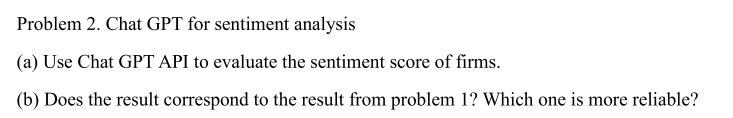

### Chat GPT results:

- 위 형식과 같이 positive/negative, confidence 0~1 사이로 달라고 함.
- 오직 positive/negative만 있다고 했음. (neutral로 줬길래 다시 하라고 함.)




#### Article 1:

Sentiment: Positive / Confidence: 0.85

The article primarily highlights the innovative design and the growing interest in Tesla's Cybertruck. It discusses the uniqueness of the vehicle, its design inspirations, and the attention it's garnering. While it mentions some challenges and a past incident, the overall tone appears to focus on the positive aspects like interest from new markets and innovative design influences. This leads to a positive sentiment assessment. My confidence level is 0.85, as the article balances between discussing some of the setbacks and the enthusiasm around the product, but leans more towards the positive aspects.


In [40]:
results[0]

(0, [{'label': 'POSITIVE', 'score': 0.8642880916595459}])


#### Article 2: 

Sentiment: Positive / Confidence: 0.90

The article provides a detailed overview of Tesla's new software update and its features, emphasizing the benefits and potential improvements to driving experience and safety. It discusses various new icons, their meanings, and how they integrate into the navigation system, portraying these enhancements in a positive light. The tone is informative and seems to highlight the advantages of the update, suggesting a positive sentiment. My confidence level in this assessment is 0.90, as the article mainly focuses on the positive aspects of the new features, with little to no mention of negatives or drawbacks.


In [41]:
results[1]

(1, [{'label': 'POSITIVE', 'score': 0.9974752068519592}])


#### Article 3:

Sentiment: Negative / Confidence: 0.65

The article highlights Tesla's expansion ambitions but also underscores significant challenges and criticisms. The concerns about environmental impact, the lack of a timeframe for authorization, and Tesla's critique of the German government's policy decisions contribute to a more negative sentiment. The challenges seem to outweigh the positive aspects of expansion in this context. My confidence level is 0.65, reflecting the presence of positive elements like expansion plans but a stronger emphasis on the hurdles and criticisms faced.


In [42]:
results[2]

(2, [{'label': 'POSITIVE', 'score': 0.9957178235054016}])

원래 GPT는 neutral 줬음. 


#### Article 4: 

Sentiment: Negative / Confidence: 0.90

This article focuses on the challenges and difficulties Tesla faces in scaling up production of the Cybertruck, particularly due to issues with its 4680 battery production. It details technical and production-related problems, such as the struggles with the dry-coating process, high scrap rates, and the complexity of scaling up new technologies. The overall tone is centered around the obstacles and hurdles Tesla is encountering, which gives it a negative sentiment. My confidence level in this assessment is 0.90, as the article predominantly highlights the struggles rather than successes or positive aspects of Tesla's endeavors.


In [43]:
results[3]

(3, [{'label': 'NEGATIVE', 'score': 0.9995156526565552}])


#### Article 5: 

Sentiment: Negative / Confidence: 0.85

The article focuses on the controversy surrounding Tesla's abrupt removal of Disney+ accessibility in its vehicles and Elon Musk's conflict with Disney CEO Bob Iger. The tone is critical, highlighting a corporate spat, customer inconvenience, and negative reactions from an influencer. The overall sentiment is shaped by the portrayal of Musk's actions as potentially retaliatory and the negative impact on Tesla owners. This leads to a negative sentiment assessment. My confidence level is 0.85, as the article largely centers on the fallout and criticism of Musk's decision, overshadowing any neutral or positive aspects.


In [45]:
results[4]

(4, [{'label': 'NEGATIVE', 'score': 0.999707043170929}])


#### Article 6:

Sentiment: Negative / Confidence: 0.90

The article discusses Tesla's recall of over 2 million electric vehicles due to issues with its Autopilot system, emphasizing skepticism about the effectiveness of the proposed fix. It outlines concerns from experts and regulatory bodies about the system's ability to ensure driver attention and safety. The overall tone is critical, highlighting the shortcomings of Tesla's technology and the potential ineffectiveness of the recall strategy. This leads to a negative sentiment assessment. My confidence level is 0.90, as the article predominantly focuses on the challenges and criticisms of Tesla's approach, with a clear emphasis on the doubts and issues raised by experts and authorities.


In [46]:
results[5]

(5, [{'label': 'NEGATIVE', 'score': 0.9989995360374451}])


#### Article 7:


Sentiment: Negative / Confidence: 0.90

The article discusses the findings of a LendingTree analysis which shows that Tesla drivers are involved in more accidents than drivers of any other brand, and also touches on the recent recall of Tesla vehicles over Autopilot software issues. The tone is predominantly focused on the high accident rates associated with Tesla vehicles and the criticism of Tesla's Autopilot system, particularly its fundamental flaws as perceived by experts. These aspects lead to a negative sentiment assessment. My confidence level in this assessment is 0.90, as the primary focus of the article is on the negative aspects related to Tesla's safety record and the challenges with its technology.




In [47]:
results[6]

(6, [{'label': 'NEGATIVE', 'score': 0.99357670545578}])

## Q3. NLP signal backtest

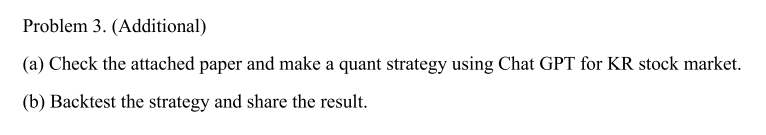

## Q4. Bla Bla